# Autocorrelation and Partial Autocorrelation

In this note, we follow Jason's blog: [A Gentle Introduction to Autocorrelation and Partial Autocorrelation](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/). In addition, I also add some contents like the definition of autocorrelation and meaning of partial autocorrelation. 

In [6]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import sys

sys.path.append("/Users/hhhung/anaconda/lib/python3.4/site-packages/")

## Minimum Daily Temperatures Dataset

In the following, we use the data about minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia. The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Learn more and download the dataset from [Dara Market](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line). Download the dataset and place it in your current working directory with the filename “daily-minimum-temperatures.csv‘”.

In [19]:
data = pd.read_csv('/Users/hhhung/Desktop/daily-minimum-temperatures-in-me.csv', error_bad_lines=False)
series = [float(x) for x in data['Daily minimum temperatures in Melbourne Australias 1981-1990'].tolist()]

In [21]:
data.head()

,Date,Daily minimum temperatures in Melbourne Australias 1981-1990
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
import datetime as dtte
start = dtte.datetime.strptime("1-Jan-1981", "%d-%b-%Y")
daterange = pd.date_range(start, periods=3650, freq='1D')
daterange

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-20', '1990-12-21', '1990-12-22', '1990-12-23',
               '1990-12-24', '1990-12-25', '1990-12-26', '1990-12-27',
               '1990-12-28', '1990-12-29'],
              dtype='datetime64[ns]', length=3650, freq='D')

## Visualize Time Series

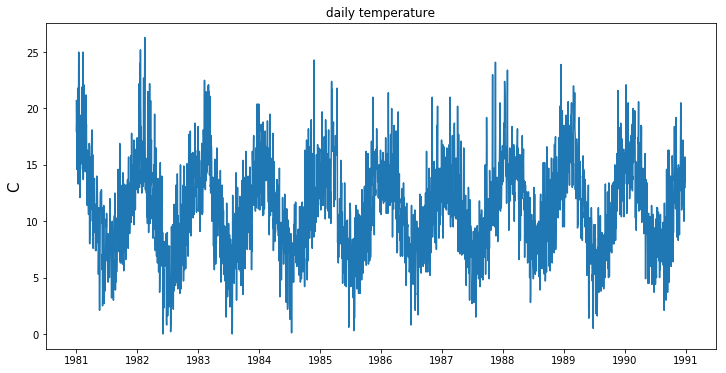

In [24]:
plt.figure(figsize=(12,6))
plt.plot(daterange, series)
plt.title('daily temperature')
plt.ylabel('C', fontsize=15)
plt.show()


## Correlation and Autocorrelation

Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables. The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation. The Pearson's corelation coefficient is defined as

$$ c(x,y)=\frac{\sum^{N}_{i=1}(x_i - \bar{x})(y_{i} - \bar{y})}{\sum^N_{i=1}(x_i - \bar{x})^2 \sum^N_{i=1}(y_i - \bar{y})^2} $$


For time series data, we can calculate the correlation for observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a **serial correlation**, or an **autocorrelation**.

Given time series measurements, $y_1, y_2, ..., y_N$ at time $t_1, t_2, ..., t_N$, the [definition of the lag autocorrelation function](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm) reads as

$$ r_k=\frac{\sum^{N-k}_{i=1}(y_i - \bar{y})(y_{i+k} - \bar{y})}{\sum^N_{i=1}(y_i - \bar{y})^2} $$

Autocorrelation is a correlation coefficient. However, instead of correlation between two different variables (cf above, $x$ and $y$), the correlation is between two values of the same variable $x$ at times $t_i$ and $t_{i+k}$.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Below is an example of calculating and plotting the autocorrelation plot for the Minimum Daily Temperatures using the plot_acf() function from the statsmodels library.

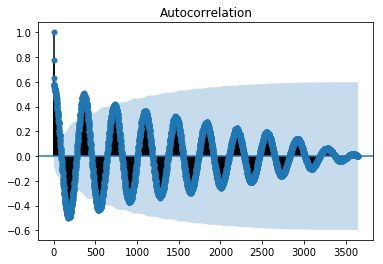

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
plt.show()

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

By default, all lag values are printed, which makes the plot noisy.

We can limit the number of lags on the x-axis to 50 to make the plot easier to read.

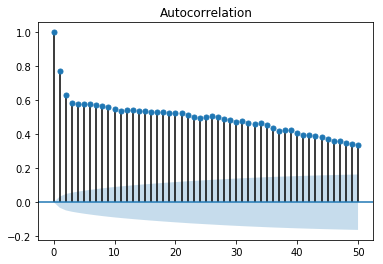

In [26]:
plot_acf(series, lags=50)
plt.show()

## Partial Autocorrelation Function

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of **intervening observations removed**.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the **direct correlation and indirect correlations**. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

Let's explain it further. Assume $y_t$ and $y_{t-1}$ are correlated, then $y_{t-1}$ and $y_{t-2}$ must also be correlated. Thus $y_t$ and $y_{t-2}$ might be correlated, simply because they are both connected to $y_{t-1}$, rather than because of any new information contained in $y_{t-2}$ that could be used in forecasting $y_t$.


To overcome this problem, we can use partial autocorrelations. These measure the relationship between $y_t$ and $y_{t -k}$ after removing the effects of other time lags -- 1,2,3,…,k-1. So the first partial autocorrelation is identical to the first autocorrelation, because there is nothing between them to remove. The partial autocorrelations for lags 2, 3 and greater are calculated as follows:

$$\alpha_k= \textrm{kth partial autocorrelation coefficient = the estimate of } \phi_k \textrm{ in the autoregression model}$$

where $y_t=c+\phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_k y_{t-k} + e_t$. The definition explaned above is from [Rob and George's book](https://www.otexts.org/fpp/8/5), i.e. you perform autoregression model and find the coefficient.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

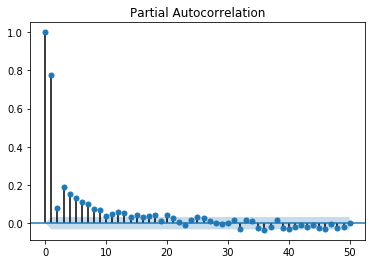

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.show()

## Intuition for ACF and PACF Plots

Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story.

We can use the intuition for ACF and PACF above to explore some thought experiments.

### Autoregression Intuition

Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that **includes direct and indirect dependence information**.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

### Moving Average Intuition

Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.